**Purpose**
This is a brief EDA for the car_1 dataset that we chose to use. All other EDAs are against the soccer_1 dataset.
This is different from the other EDAs in that it is not testing out a model but is instead exploring the dataset.

In [87]:
# preliminary setup/helpful functions

import sqlite3
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://matplotlib.org/stable/gallery/color/named_colors.html
FETCH_TYPE_ONE = "one"
FETCH_TYPE_ALL = "all"

DB_NAME = "car_1.sqlite"
DB_DIR = "src\\deployment\\data" 
def run_command(command, fetch_type=FETCH_TYPE_ONE):
    cursor = sqlite3.connect(f"..\\..\\{DB_DIR}\\{DB_NAME}")
    
    result = None
    if fetch_type == FETCH_TYPE_ONE:
        result = cursor.execute(command).fetchone()
    elif fetch_type == FETCH_TYPE_ALL:
        result = cursor.execute(command).fetchall()                
        
    cursor.close()
    return result

# first, we should verify that all tables within the database exist. elsewise we run the risk of operating against an invalid database
tables_tuple_list = run_command(command="SELECT name FROM sqlite_schema WHERE type='table' AND name NOT LIKE 'sqlite_%'", fetch_type=FETCH_TYPE_ALL)
actual_tables_set = set(list(map(lambda table_tuple: table_tuple[0], tables_tuple_list)))
expected_table_set = set(('continents', 'countries', 'car_makers', 'model_list', 'car_names', 'cars_data'))

# edits to the expected set of tables will cause this to exit execution if those tables are also not added/adjusted within the database and comitted.\n",
if (len(expected_table_set.difference(actual_tables_set)) != 0):
    print(f"Error. It looks like not all expected tables are present in the databse. This may occur if you do not have {DB_NAME} in the {DB_DIR}."),
    sys.exit()


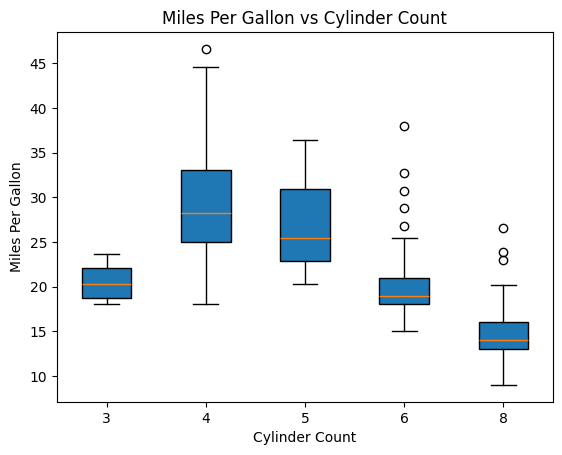

In [ ]:
# load the data with a sql command and then convertg it to a pandas data frame
cylinders_mpg_hp = run_command(command="SELECT Cylinders, cast(MPG AS FLOAT), cast(Horsepower AS FLOAT) FROM cars_data", fetch_type=FETCH_TYPE_ALL)
cylinders_mpg_hp_df = pd.DataFrame(cylinders_mpg_hp, columns=['cylinders', 'mpg', 'horsepower'])

# split data by each cylinder amount
labels = set(cylinders_mpg_hp_df['cylinders'].sort_values())

# evaluate each entry and decipher which label it belongs under
# create empty lists per amount of unique cylinders
# actually just look at mpg
mpg_hp_data = []
for label in labels:
    mpg_hp_data.append([])

CYLINDER_IDX = 1
MPG_IDX = 2
for entry in cylinders_mpg_hp_df.itertuples():
    label_idx = list(labels).index(entry[CYLINDER_IDX])
    if entry[MPG_IDX] != 0:
        mpg_hp_data[label_idx].append(entry[MPG_IDX])

# https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py    
fig, ax = plt.subplots()
bplot = ax.boxplot(
    mpg_hp_data,
    tick_labels=list(labels),
    patch_artist=True,
)

X_AXIS = "Cylinder Count"
Y_AXIS = "Miles Per Gallon"
ax.set_title(f"{Y_AXIS} vs {X_AXIS}")
ax.set_xlabel(X_AXIS)
ax.set_ylabel(Y_AXIS)

plt.show()

# this makes sense considering that 4 cylinders are most commonly used
# additionally, 3 cylinders arent all that common and are not always the best performing

the major outlier for 6 cyliders appears to be an olds mobile disel
this makes sense considering that disels get realtively better mileage that gasoline engines1



next, investigate engine size versus mileage, color by cylinder count
engine displacement is engine displacement volume in cubic inches

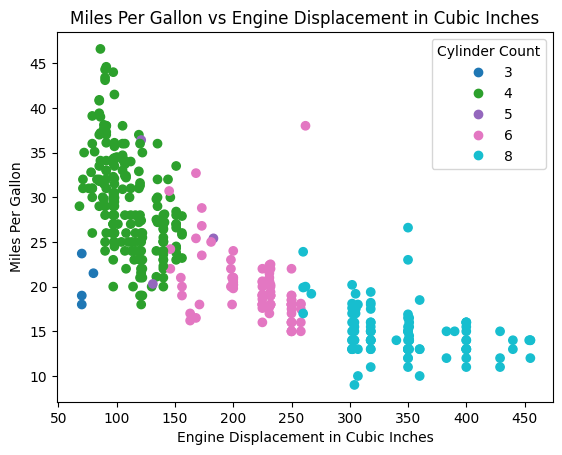

In [61]:
cylinders_edispl_mpg = run_command(command="SELECT Cylinders, Edispl, cast(MPG AS FLOAT) FROM cars_data", fetch_type=FETCH_TYPE_ALL)
cylinders_edispl_mpg_df = pd.DataFrame(cylinders_edispl_mpg, columns=['cylinders', 'displacement', 'mpg'])

mpg_disp_data_x = []
mpg_disp_data_y = []
mpg_disp_data_cyl = []

CYLINDER_IDX = 1
DISPLACEMENT_IDX = 2
MPG_IDX = 3
for entry in cylinders_edispl_mpg_df.itertuples():
    if entry[DISPLACEMENT_IDX] != 0 and entry[MPG_IDX] != 0:
        mpg_disp_data_x.append(entry[DISPLACEMENT_IDX])
        mpg_disp_data_y.append(entry[MPG_IDX])
        mpg_disp_data_cyl.append(entry[CYLINDER_IDX])

# https://www.w3schools.com/python/matplotlib_scatter.asp
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
fig, ax = plt.subplots()
scatter = ax.scatter(x=mpg_disp_data_x, y=mpg_disp_data_y, c=mpg_disp_data_cyl, cmap='tab10')

X_AXIS = "Engine Displacement in Cubic Inches"
Y_AXIS = "Miles Per Gallon"
ax.set_title(f"{Y_AXIS} vs {X_AXIS}")
ax.set_xlabel(X_AXIS)
ax.set_ylabel(Y_AXIS)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cylinder Count")
plt.show()


"The year 1970 marked a significant shift for big-block V8 engines in passenger cars due to the oil crises and the tightening of emission standards"

Instead of emission, maybe show amount of cylinders per car not counting 3s or 5s overtime
see shift with less v8s hopefully
what time period?

1982 - 1970 = 12

[(3, 1972, 1), (3, 1973, 1), (3, 1977, 1), (3, 1980, 1), (4, 1970, 8), (4, 1971, 14), (4, 1972, 14), (4, 1973, 11), (4, 1974, 15), (4, 1975, 12), (4, 1976, 15), (4, 1977, 14), (4, 1978, 17), (4, 1979, 12), (4, 1980, 25), (4, 1981, 22), (4, 1982, 28), (5, 1978, 1), (5, 1979, 1), (5, 1980, 1), (6, 1970, 4), (6, 1971, 8), (6, 1973, 8), (6, 1974, 7), (6, 1975, 12), (6, 1976, 10), (6, 1977, 5), (6, 1978, 12), (6, 1979, 6), (6, 1980, 2), (6, 1981, 7), (6, 1982, 3), (8, 1970, 23), (8, 1971, 7), (8, 1972, 13), (8, 1973, 20), (8, 1974, 5), (8, 1975, 6), (8, 1976, 9), (8, 1977, 8), (8, 1978, 6), (8, 1979, 10), (8, 1981, 1)]
{1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982}


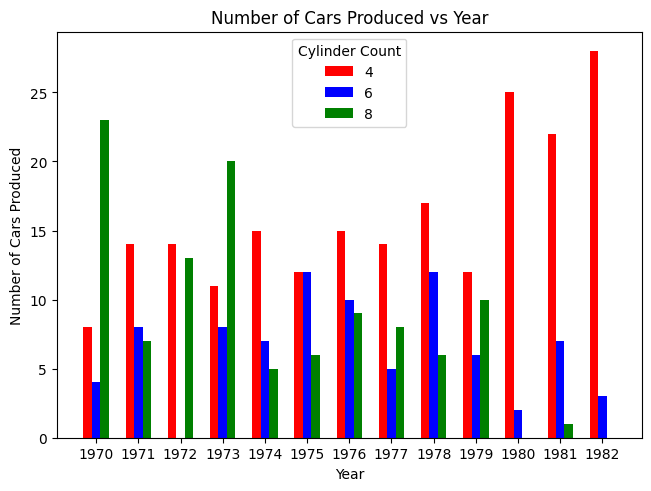

In [ ]:
cylinders_by_year = run_command(command="SELECT CYLINDERS, YEAR, COUNT(*) FROM cars_data GROUP BY CYLINDERS, YEAR", fetch_type=FETCH_TYPE_ALL)
print(cylinders_by_year)

cylinders_by_years_df = pd.DataFrame(cylinders_by_year, columns=['cylinders', 'year', 'count'])

years = set(cylinders_by_years_df['year'].sort_values())
print(years)

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
cylinder_set = set(cylinders_by_years_df['cylinders'].sort_values())

# remove 3 and 5 cylinder specifications
cylinder_set.remove(3)
cylinder_set.remove(5)

cylinder_dict = {}
for cylinder in cylinder_set:
    cylinder_dict[cylinder] = [0] * len(years)

CYLINDER_IDX = 1
YEAR_IDX = 2
COUNT_IDX = 3

for entry in cylinders_by_years_df.itertuples():
    if entry[CYLINDER_IDX] != 3 and entry[CYLINDER_IDX] != 5:
        entry_list = cylinder_dict.get(entry[CYLINDER_IDX])
        year_offset = entry[YEAR_IDX] - 1970
        entry_list[year_offset] = entry[COUNT_IDX]
        
        cylinder_dict.update({CYLINDER_IDX: entry_list})

# https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
x = np.arange(len(years))
width = 0.2
fig, ax = plt.subplots(layout='constrained')
bar_1 = plt.bar(x-0.2, cylinder_dict[4], width, color='red')
bar_2 = plt.bar(x, cylinder_dict[6], width, color='blue')
bar_3 = plt.bar(x+0.2, cylinder_dict[8], width, color='green')
plt.xticks(x, years)

X_AXIS = "Year"
Y_AXIS = "Number of Cars Produced"
ax.set_title(f"{Y_AXIS} vs {X_AXIS}")
ax.set_xlabel(X_AXIS)
ax.set_ylabel(Y_AXIS)

legend = ax.legend(handles=[bar_1, bar_2, bar_3], labels=['4', '6', '8'], title="Cylinder Count")

plt.show()
